In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy

# data processing

In [4]:
dataset = pd.read_csv(r'D:\yuce0.csv',encoding="ISO-8859-1")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Male                         893 non-null    int64
 1   Female                       893 non-null    int64
 2   Primary school and below     893 non-null    int64
 3   Junior high school           893 non-null    int64
 4   High school and above        893 non-null    int64
 5   Unemployed                   893 non-null    int64
 6   In employment                893 non-null    int64
 7   Urban                        893 non-null    int64
 8   Rural                        893 non-null    int64
 9   Misbehavior,no               893 non-null    int64
 10  Misbehavior,yes              893 non-null    int64
 11  Age of first drug use,<18    893 non-null    int64
 12  Age of first drug use,18-25  893 non-null    int64
 13  Age of first drug use,>25    893 non-null    int64

,Male,Female,Primary school and below,Junior high school,High school and above,Unemployed,In employment,Urban,Rural,"Misbehavior,no",...,"Traumatic events,no","Traumatic events,yes",Unsatisfactory,General satisfaction,Satisfactory,Physical neglect,Emotional abuse,Emotional neglect,Sexual abuse,Relapse
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.522956,0.477044,0.346025,0.409854,0.244121,0.614782,0.385218,0.789474,0.210526,0.135498,...,0.695409,0.304591,0.020157,0.107503,0.872340,10.900336,6.113102,12.974244,5.740202,0.845465
std,0.499753,0.499753,0.475968,0.492082,0.429806,0.486920,0.486920,0.407911,0.407911,0.342447,...,0.460492,0.460492,0.140615,0.309925,0.333897,2.764308,1.855055,6.160449,1.671351,0.361664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,8.000000,5.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,10.000000,5.000000,11.000000,5.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,13.000000,7.000000,18.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,15.000000,23.000000,14.000000,1.000000


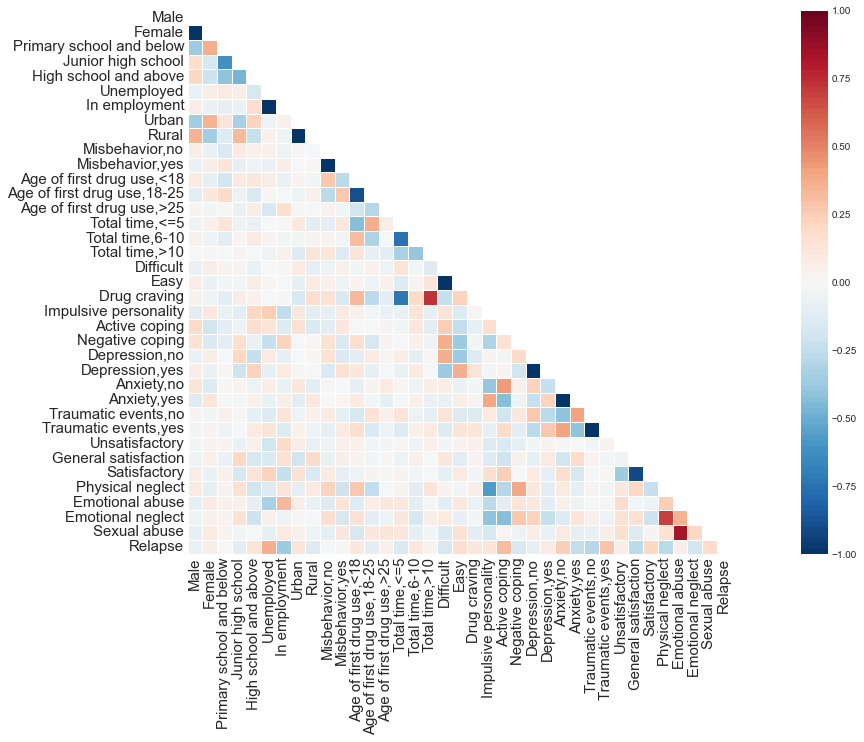

In [3]:
# Create a correlation plot of both datasets.
import seaborn as sns
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);


font1 = {
# 'weight' : 'normal',
'size' : 15,
}
#legend = plt.legend(handles=[A,B],prop=font1)
plt.tick_params(labelsize=15)


plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
#plt.legend(X)
plt.savefig('0.png',dpi=600,bbox_inches="tight")
plt.show()

In [4]:
feat_labels = dataset.columns[:36]

In [5]:
print(feat_labels)

Index(['Male', 'Female', 'Primary school and below', 'Junior high school',
       'High school and above', 'Unemployed', 'In employment', 'Urban',
       'Rural', 'Misbehavior,no', 'Misbehavior,yes',
       'Age of first drug use,<18', 'Age of first drug use,18-25',
       'Age of first drug use,>25', 'Total time,<=5', 'Total time,6-10',
       'Total time,>10', 'Difficult', 'Easy', 'Drug craving',
       'Impulsive personality', 'Active coping', 'Negative coping',
       'Depression,no', 'Depression,yes', 'Anxiety,no', 'Anxiety,yes',
       'Traumatic events,no', 'Traumatic events,yes', 'Unsatisfactory',
       'General satisfaction', 'Satisfactory', 'Physical neglect',
       'Emotional abuse', 'Emotional neglect', 'Sexual abuse'],
      dtype='object')


In [5]:
y = dataset['Relapse']
X = dataset.drop(['Relapse'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

No handles with labels found to put in legend.


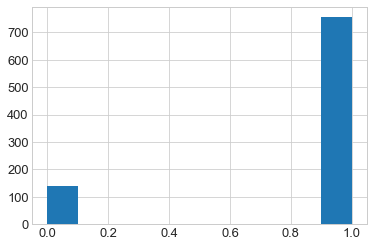

In [7]:
dataset['Relapse'].hist()

font = {'weight': 'normal',
         'size': 15,
         };    
    
plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=13)
plt.savefig('分类值.png',dpi=600,bbox_inches="tight")
plt.show()

No handles with labels found to put in legend.


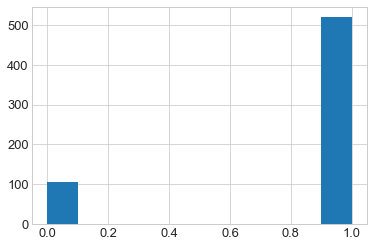

In [8]:
y_train.hist()

plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=13)
plt.savefig('划分数据集后的分类值.png',dpi=600,bbox_inches="tight")
plt.show()

No handles with labels found to put in legend.


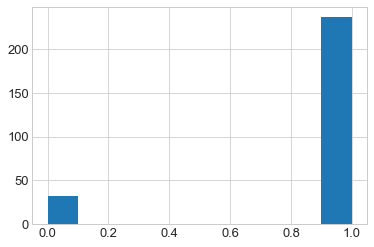

In [9]:
y_test.hist()

plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=13)
plt.savefig('测试集的分类值.png',dpi=600,bbox_inches="tight")
plt.show()

#  SMOTE-Data enhancements

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
X_resample_train, y_resample_train = SMOTE().fit_resample(X_train, y_train)
print ('The number of transactions after resampling : ' + str(len(X_resample_train)))
print ('Is the number of fraudulent transaction is equal to the number of normal tansactions? ' + str(sum(y_resample_train == 0) == sum(y_resample_train == 1)))

The number of transactions after resampling : 1038
Is the number of fraudulent transaction is equal to the number of normal tansactions? True


In [12]:
from collections import Counter
print('Before SMOTE:',Counter(y_train))
print('After SMOTE:',Counter(y_resample_train))

Before SMOTE: Counter({1: 519, 0: 106})
After SMOTE: Counter({1: 519, 0: 519})


In [13]:
print(X_resample_train.shape)

(1038, 36)


In [8]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_resample_train)
X_resample_train = scaler.transform(X_resample_train)  
X_test = scaler.transform(X_test) 

No handles with labels found to put in legend.


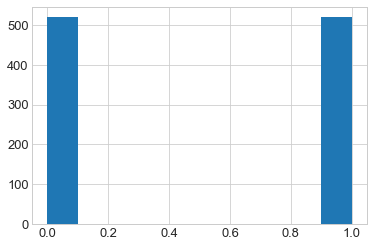

In [15]:
y_resample_train.hist()

plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=13)
plt.savefig('SMOTE后的分类值.png',dpi=600,bbox_inches="tight")
plt.show()

# Data presentation

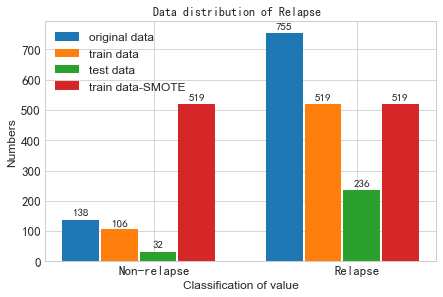

In [415]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

config = {
            "font.family": 'serif',
            "font.size": 12,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
labels = ['Non-relapse', 'Relapse']
a = [138, 755]
b = [106, 519]
c = [32, 236]
d = [519, 519]
x = np.arange(len(labels))  
width = 0.18  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, a, width, label='original data')
rects2 = ax.bar(x - width+0.01, b, width, label='train data')
rects3 = ax.bar(x + 0.02, c, width, label='test data')
rects4 = ax.bar(x + width+ 0.03, d, width, label='train data-SMOTE')


ax.set_title('Data distribution of Relapse ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=11)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
font1 = {'family':'Arial' ,
         'weight': 'normal',
         'size': 12,
         };   

plt.tick_params(labelsize=13)
plt.legend(prop=font1)
plt.xlabel('Classification of value',font1)
plt.ylabel('Numbers',font1)
plt.savefig('data.png',dpi=600,bbox_inches="tight")
plt.show()

# Machine learning models

# LR

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10,
                   class_weight=None,
                   dual=False, 
                   fit_intercept=True,
                   intercept_scaling=1, 
                   max_iter=100, 
                   multi_class='ovr',
                   n_jobs=1,
                   penalty='l2',
                   random_state=None, 
                   solver='liblinear',
                   tol=0.0001,
                   verbose=0, 
                   warm_start=False)

lr.fit(X_resample_train,y_resample_train)
y_pre_log = lr.predict(X_test)

Feature: 0, Score: 0.00012
Feature: 1, Score: 0.00089
Feature: 2, Score: 0.00038
Feature: 3, Score: 0.00007
Feature: 4, Score: 0.00113
Feature: 5, Score: 0.00261
Feature: 6, Score: -0.00259
Feature: 7, Score: 0.00098
Feature: 8, Score: -0.00025
Feature: 9, Score: 0.00023
Feature: 10, Score: 0.00052
Feature: 11, Score: 0.00088
Feature: 12, Score: -0.00027
Feature: 13, Score: 0.00052
Feature: 14, Score: -0.00085
Feature: 15, Score: 0.00115
Feature: 16, Score: 0.00087
Feature: 17, Score: -0.00113
Feature: 18, Score: 0.00140
Feature: 19, Score: 0.00124
Feature: 20, Score: 0.00107
Feature: 21, Score: 0.00178
Feature: 22, Score: -0.00117
Feature: 23, Score: -0.00054
Feature: 24, Score: 0.00057
Feature: 25, Score: 0.00177
Feature: 26, Score: -0.00146
Feature: 27, Score: -0.00240
Feature: 28, Score: 0.00240
Feature: 29, Score: 0.00054
Feature: 30, Score: -0.00075
Feature: 31, Score: 0.00114
Feature: 32, Score: -0.00171
Feature: 33, Score: 0.00061
Feature: 34, Score: -0.00104
Feature: 35, Score

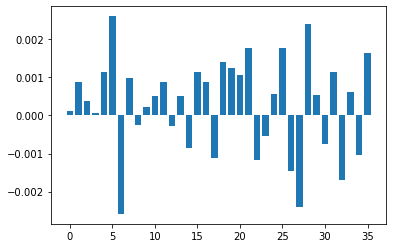

In [11]:
from matplotlib import pyplot
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
plt.savefig('importance-LR.png',dpi=600,bbox_inches="tight")
pyplot.show()

# SVM

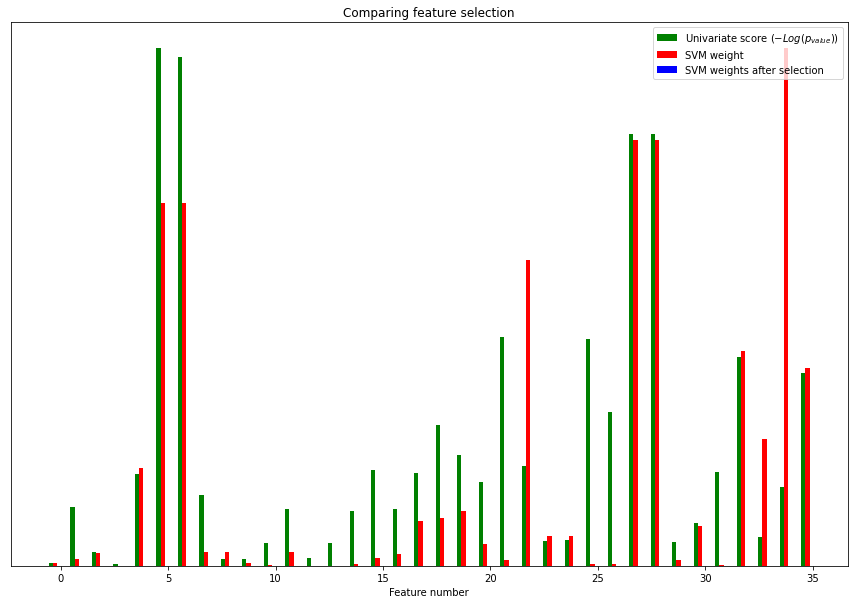

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

svc_classifier = SVC(kernel = 'linear', C = 10, Probability = 3, shrinking = True)
svc_classifier.fit(X_resample_train, y_resample_train)

fig = plt.figure(figsize=(15,10)) 

X_indices = np.arange(X_resample_train.shape[-1])

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X_resample_train, y_resample_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

# svmc = svm.SVC(kernel='linear')
# svmc.fit(X_resample_train, y_resample_train)
svmc = svc_classifier

svm_weights = (svmc.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()


plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

svmc_selected = svm.SVC(kernel='linear')
svmc_selected.fit(selector.transform(X), y)

svm_weights_selected = (svmc_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.savefig('importance-SVM.png',dpi=600,bbox_inches="tight")
plt.show()

# DT

In [14]:
dt_classifier = DecisionTreeClassifier(max_features = 30, random_state = 10,
                                           criterion="gini",
                                         splitter="random",
                                         max_depth=None,
                                         min_samples_split=0.199,
                                         min_samples_leaf=1,
                                         min_impurity_decrease=0.03,
                                         min_weight_fraction_leaf=0.02 )
dt_classifier.fit(X_resample_train, y_resample_train)

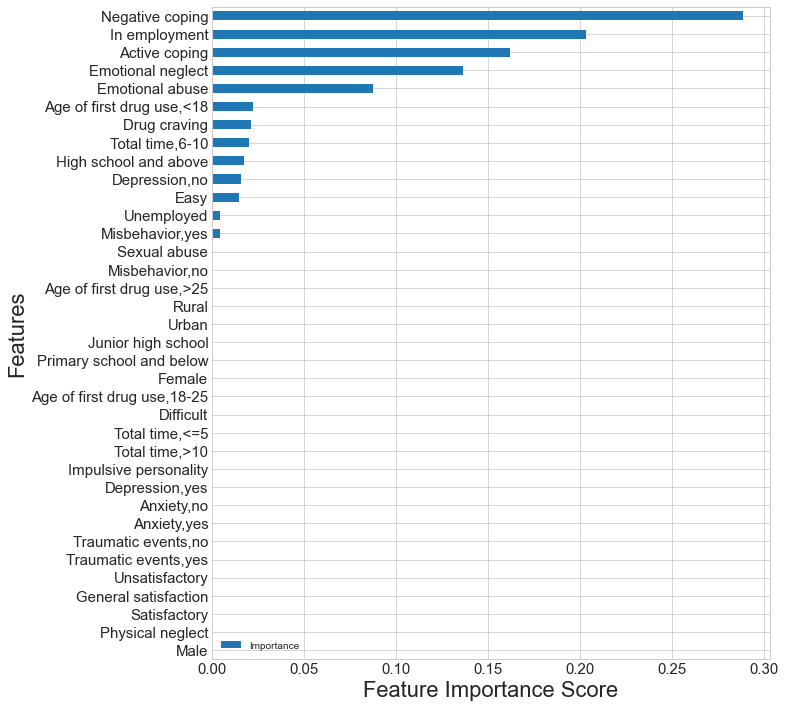

In [21]:
dt_classifier.fit(dataset.drop('Relapse', axis=1), dataset['Relapse'])

plt.style.use('seaborn-whitegrid')
importance = dt.feature_importances_
importance = pd.DataFrame(importance, index=dataset.drop('Relapse', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(10,len(importance)/3))


font1 = {
# 'weight' : 'normal',
'size' : 15,
}
#legend = plt.legend(handles=[A,B],prop=font1)
plt.tick_params(labelsize=15)


plt.xlabel('Feature Importance Score',fontsize=22)
plt.ylabel('Features',fontsize=22)
#plt.legend(X)
plt.savefig('importance-DT.png',dpi=600,bbox_inches="tight")
plt.show()

# RF

# See RF-importance in code.ipynb, where the results have been shown

# ANN

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=36))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.fit(X_resample_train, y_resample_train,epochs=300)

Epoch 1/300
20/20 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.8192
Epoch 2/300
20/20 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8192
Epoch 3/300
20/20 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.8208
Epoch 4/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8368
Epoch 5/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.8496
Epoch 6/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8512
Epoch 7/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8576
Epoch 8/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8624
Epoch 9/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8624
Epoch 10/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8688
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9408
Epoch 84/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9456
Epoch 85/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9520
Epoch 86/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9456
Epoch 87/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9456
Epoch 88/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9552
Epoch 89/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9392
Epoch 90/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9552
Epoch 91/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.9472
Epoch 92/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9536
Epoch 93/300


20/20 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9648
Epoch 246/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9616
Epoch 247/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9616
Epoch 248/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9616
Epoch 249/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.9616
Epoch 250/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9664
Epoch 251/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9648
Epoch 252/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9648
Epoch 253/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.9600
Epoch 254/300
20/20 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9728
Epoc

In [26]:
def base_model():
    model = Sequential()
    model.add(Dense(3, input_dim=36, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer = 'adam')
    return model

base_model = KerasRegressor(build_fn=base_model, epochs=100, batch_size=1,verbose=0)

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

my_model = KerasRegressor(build_fn=base_model)    
my_model.fit(X_resample_train, y_resample_train)

perm = PermutationImportance(my_model, random_state=1).fit(X, y)
# X_test = pd.DataFrame(X_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

28/28 [==============================] - 0s 1ms/step - loss: 0.4992


Weight,Feature
0.0049 ± 0.0010,Active coping
0.0030 ± 0.0022,Emotional neglect
0.0022 ± 0.0001,Sexual abuse
0.0012 ± 0.0012,Negative coping
0.0011 ± 0.0003,Drug craving
0.0008 ± 0.0001,Unemployed
0.0007 ± 0.0001,"Anxiety,yes"
0.0006 ± 0.0007,Impulsive personality
0.0003 ± 0.0001,"Depression,no"
0.0003 ± 0.0000,"Depression,yes"


# NB

[ 0.          0.00038536  0.00134875  0.          0.         -0.00077071
 -0.00077071  0.          0.         -0.00019268  0.00019268 -0.00077071
  0.          0.00327553 -0.00038536 -0.00019268 -0.00019268  0.00134875
  0.00134875 -0.00038536  0.00057803  0.00057803 -0.00038536  0.0017341
  0.0017341  -0.00038536 -0.00038536  0.0344894   0.0344894   0.00211946
  0.          0.          0.00077071 -0.00019268  0.00115607  0.01965318]


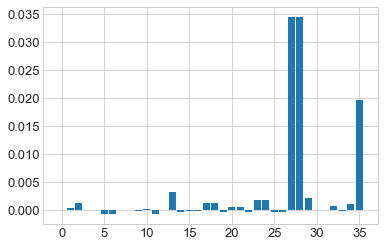

In [34]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_resample_train,y_resample_train)
imps = permutation_importance(nb, X,y)
print(imps.importances_mean)

plt.bar(range(len(imps.importances_mean)), imps.importances_mean)
plt.tick_params(labelsize=13)
plt.savefig('importance-NB.png',dpi=600,bbox_inches="tight")
plt.show()

# RF

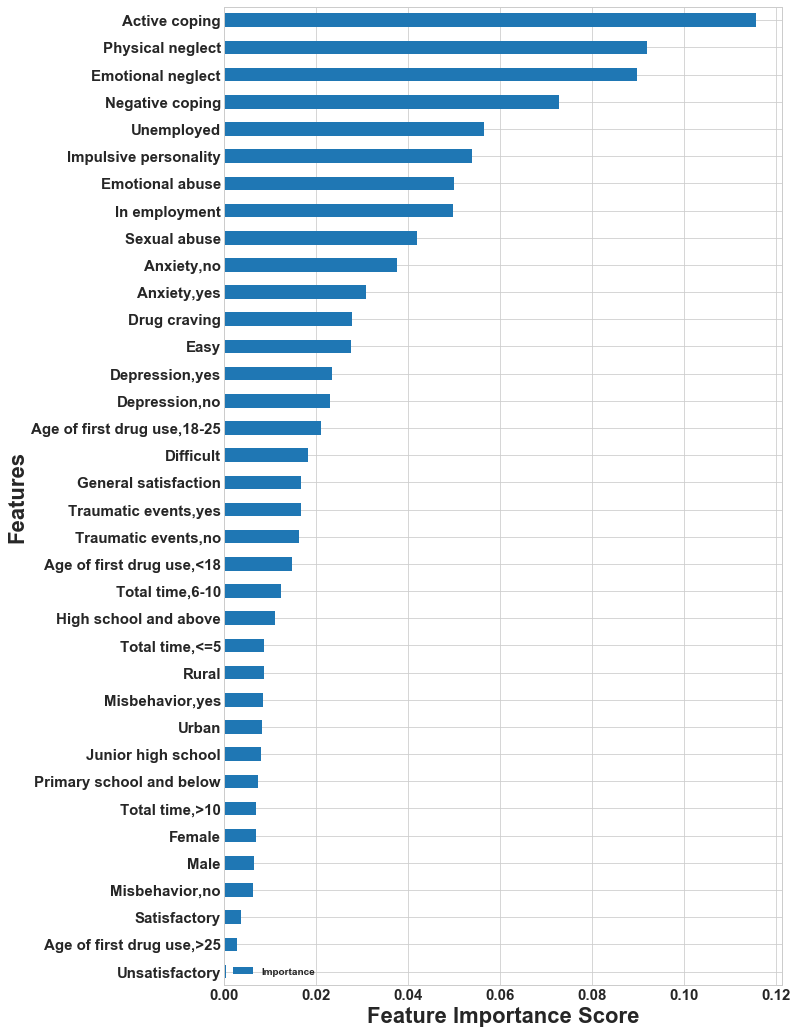

In [305]:
clf = RandomForestClassifier(max_depth = 5, n_estimators = 100, 
                             criterion = 'gini', random_state = 0)

clf.fit(dataset.drop('Relapse', axis=1), dataset['Relapse'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset.drop('Relapse', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(10,len(importance)/2))


font1 = {
# 'weight' : 'normal',
'size' : 15,
}
#legend = plt.legend(handles=[A,B],prop=font1)
plt.tick_params(labelsize=15)


plt.xlabel('Feature Importance Score',fontsize=22)
plt.ylabel('Features',fontsize=22)
#plt.legend(X)
plt.savefig('importance-1.png',dpi=600,bbox_inches="tight")
plt.show()

# Random division of data - comparison of the results of machine learning models

[0.77714286 0.75685714 0.74514286 0.742      0.74742857 0.76142857]
[0.70892857 0.7125     0.71571429 0.71857143 0.72107143 0.72321429]
[0.87392857 0.87121429 0.86885714 0.86685714 0.86521429 0.86392857]
[0.94535714 0.93892857 0.93571429 0.93571429 0.93892857 0.94535714]
[0.9025     0.90292857 0.90228571 0.90057143 0.89778571 0.89392857]
[0.7225     0.72035714 0.71857143 0.71714286 0.71607143 0.71535714]


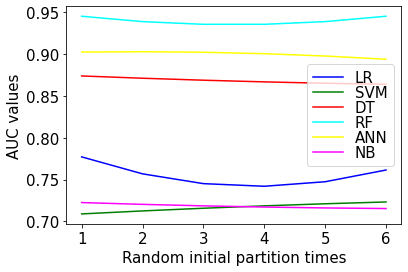

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

LR_AUC_scores=[]
SVM_AUC_scores=[]
DT_AUC_scores=[]
RF_AUC_scores=[]
ANN_AUC_scores=[]
NB_AUC_scores=[]
random_state=[0,1,5,10,20,42]

for i in range(len(random_state)):
#     print(random_state[i])  
    #数据处理
    y = dataset['Relapse']
    X = dataset.drop(['Relapse'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state[i])

    X_resample_train, y_resample_train = SMOTE().fit_resample(X_train, y_train) 
    scaler = StandardScaler()  
    scaler.fit(X_resample_train)
    X_resample_train = scaler.transform(X_resample_train)  
    X_test = scaler.transform(X_test) 
    
    #模型拟合
    #LR
    lr = LogisticRegression(C=0.00001,class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr',
         n_jobs=1,penalty='l2',random_state=None, solver='liblinear',tol=0.0001,verbose=0, warm_start=False)
    lr.fit(X_resample_train,y_resample_train)
    #SVM
    svc_classifier = SVC(kernel = "linear")
    svc_classifier.fit(X_resample_train, y_resample_train)
    #DT
    dt_classifier = DecisionTreeClassifier(max_features = 5, random_state = 300,criterion="gini",splitter="random",max_depth=None,
    min_samples_split=0.199, min_samples_leaf=1,min_impurity_decrease=0.03,min_weight_fraction_leaf=0.02 )
    dt_classifier.fit(X_resample_train, y_resample_train)
    #RF
    rf_classifier = RandomForestClassifier(n_estimators = 5, random_state =0)
    rf_classifier.fit(X_train, y_train)
    #ANN
    knn_classifier = KNeighborsClassifier(n_neighbors = 1)
    knn_classifier.fit(X_resample_train, y_resample_train)
    #NB
    nb = GaussianNB()
    nb.fit(X_resample_train,y_resample_train)
    
    #模型预测
    y_pre_log = lr.predict(X_test)
    y_pre_SVM = svc_classifier.predict(X_test)
    y_pre_dec = dt_classifier.predict(X_test)
    y_pre_randomtree = rf_classifier.predict(X_test)
    y_pre_K = knn_classifier.predict(X_test)
    y_pre_b = nb.predict(X_test)
    
    #参数计算
    LR_FPR,LR_TPR,threshold=roc_curve(y_test,y_pre_log,pos_label=1)
    SVM_FPR,SVM_TPR,threshold=roc_curve(y_test,y_pre_SVM,pos_label=1)
    DT_FPR,DT_TPR,threshold=roc_curve(y_test,y_pre_dec,pos_label=1)
    RF_FPR,RF_TPR,threshold=roc_curve(y_test,y_pre_randomtree,pos_label=1)
    ANN_FPR,ANN_TPR,threshold=roc_curve(y_test,y_pre_K,pos_label=1)
    NB_FPR,NB_TPR,threshold=roc_curve(y_test,y_pre_b,pos_label=1)
    
    #AUC值计算
    LR_AUC=auc(LR_FPR,LR_TPR)
    SVM_AUC=auc(SVM_FPR,SVM_TPR)
    DT_AUC=auc(DT_FPR,DT_TPR)
    RF_AUC=auc(RF_FPR,RF_TPR)
    ANN_AUC=auc(ANN_FPR,ANN_TPR)
    NB_AUC=auc(NB_FPR,NB_TPR)

    #AUC值整理
    LR_AUC_scores.append(LR_AUC)
    SVM_AUC_scores.append(SVM_AUC)
    DT_AUC_scores.append(DT_AUC)
    RF_AUC_scores.append(RF_AUC)
    ANN_AUC_scores.append(ANN_AUC)
    NB_AUC_scores.append(NB_AUC)

LR_AUC_scores = scipy.signal.savgol_filter(LR_AUC_scores, 6, 2)
SVM_AUC_scores = scipy.signal.savgol_filter(SVM_AUC_scores, 6, 2)
DT_AUC_scores = scipy.signal.savgol_filter(DT_AUC_scores, 6, 2)
RF_AUC_scores = scipy.signal.savgol_filter(RF_AUC_scores, 6, 2)
ANN_AUC_scores = scipy.signal.savgol_filter(ANN_AUC_scores, 6, 2)
NB_AUC_scores = scipy.signal.savgol_filter(NB_AUC_scores, 6, 2)

print(LR_AUC_scores)
print(SVM_AUC_scores)
print(DT_AUC_scores) 
print(RF_AUC_scores)    
print(ANN_AUC_scores)    
print(NB_AUC_scores)    

#插值平滑
plt.plot(range(1, 7), LR_AUC_scores, label="LR",color="blue")
plt.plot(range(1, 7), SVM_AUC_scores, label="SVM",color="green")
plt.plot(range(1, 7), DT_AUC_scores, label="DT",color="red")
plt.plot(range(1, 7), RF_AUC_scores, label="RF",color="cyan")
plt.plot(range(1, 7), ANN_AUC_scores, label="ANN",color="yellow")
plt.plot(range(1, 7), NB_AUC_scores, label="NB",color="magenta")

font1 = {
# 'weight' : 'normal',
'size' : 15,
}
#legend = plt.legend(handles=[A,B],prop=font1)
plt.tick_params(labelsize=15)
plt.legend(prop=font1,labelspacing=0)
plt.xlabel('Random initial partition times',fontsize=15)
plt.ylabel('AUC values',fontsize=15)
#plt.legend(X)
plt.savefig('AUC.png',dpi=600,bbox_inches="tight")
plt.show()
